In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
# df = pd.read_csv("tv_shows.csv")
# title_type = "TV shows"
df = pd.read_csv("movies.csv")
title_type = "Movies"

df.head()


,primary_title,premiered,title_id,nudity,violence,profanity,alcohol,frightening
0,Coraline,2009,tt0327597,Mild,Mild,Mild,None,Severe
1,Blood and Bone,2009,tt0346631,None,Moderate,Severe,Mild,Mild
2,Inglourious Basterds,2009,tt0361748,Mild,Severe,Severe,Mild,Severe
3,The Box,2009,tt0362478,None,Moderate,Mild,Mild,Moderate
4,Whiteout,2009,tt0365929,Mild,Moderate,Moderate,Moderate,Moderate


In [2]:
# Replace severity with numeric weights
wdf = df.replace({'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3})
wdf.head()

,primary_title,premiered,title_id,nudity,violence,profanity,alcohol,frightening
0,Coraline,2009,tt0327597,1.0,1.0,1.0,0.0,3.0
1,Blood and Bone,2009,tt0346631,0.0,2.0,3.0,1.0,1.0
2,Inglourious Basterds,2009,tt0361748,1.0,3.0,3.0,1.0,3.0
3,The Box,2009,tt0362478,0.0,2.0,1.0,1.0,2.0
4,Whiteout,2009,tt0365929,1.0,2.0,2.0,2.0,2.0


In [3]:
# Advisory ratings grouped by year
summary = wdf.groupby('premiered').agg(
    nudity=("nudity", "mean"),
    violence=("violence", "mean"),
    profanity=("profanity", "mean"),
    alcohol=("alcohol", "mean"),
    frightening=("frightening", "mean")
)
summary

,nudity,violence,profanity,alcohol,frightening
premiered,,,,,
2009,1.210863,1.648387,1.698052,1.165049,1.572368
2010,1.033784,1.669014,1.643836,1.111111,1.519713
2011,1.092593,1.600000,1.664596,1.196825,1.533546
2012,1.090343,1.704762,1.685535,1.229299,1.529221
2013,1.097983,1.695906,1.703812,1.212389,1.502994
2014,0.956164,1.672269,1.660112,1.161932,1.562857
2015,0.944767,1.562874,1.590504,1.098507,1.453731
2016,0.883008,1.507003,1.519553,1.028011,1.483146
2017,0.881503,1.577259,1.625000,1.082353,1.498542


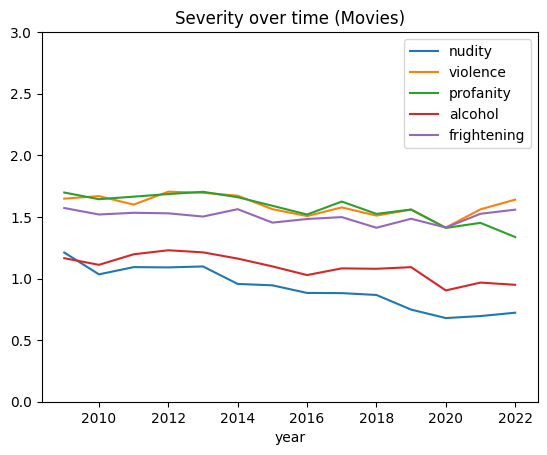

In [4]:
plot = summary.plot.line(subplots=False, xlabel='year', title=f'Severity over time ({title_type})', sharey=True, ylim=[0, 3])

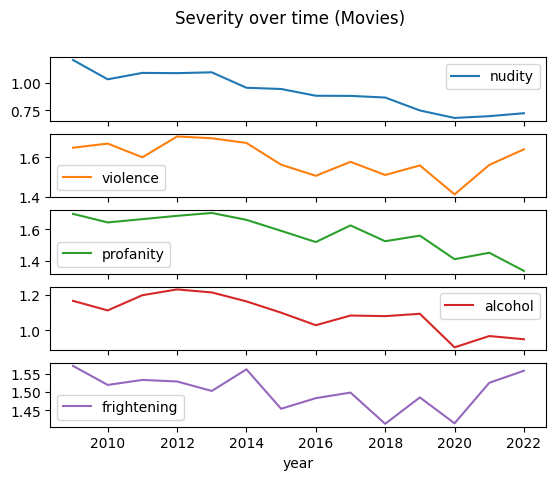

In [5]:
# Exaggerate trends
plot = summary.plot.line(subplots=True, xlabel='year', title=f'Severity over time ({title_type})')

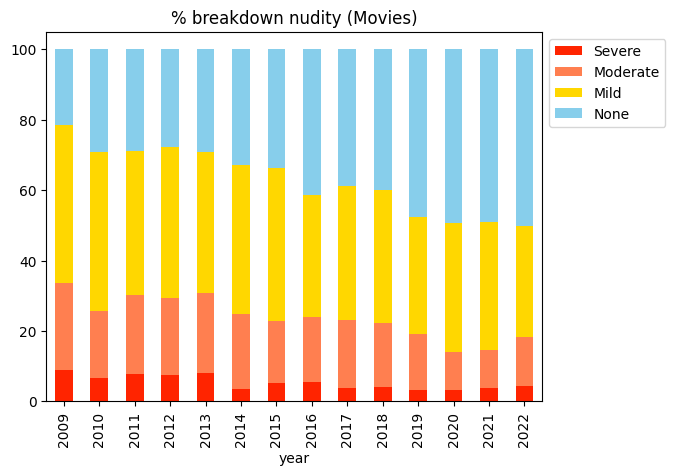

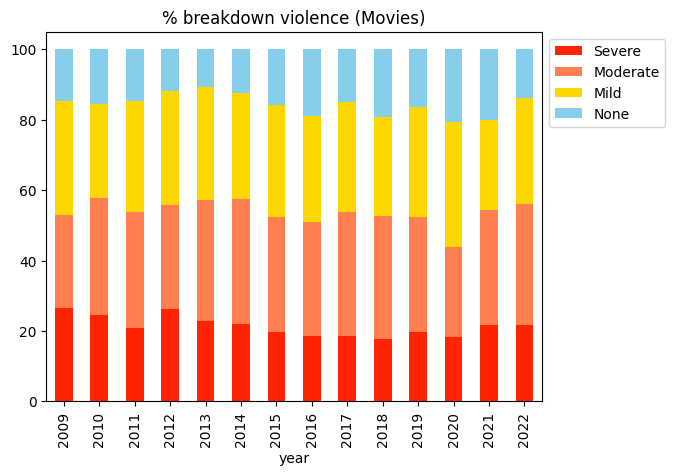

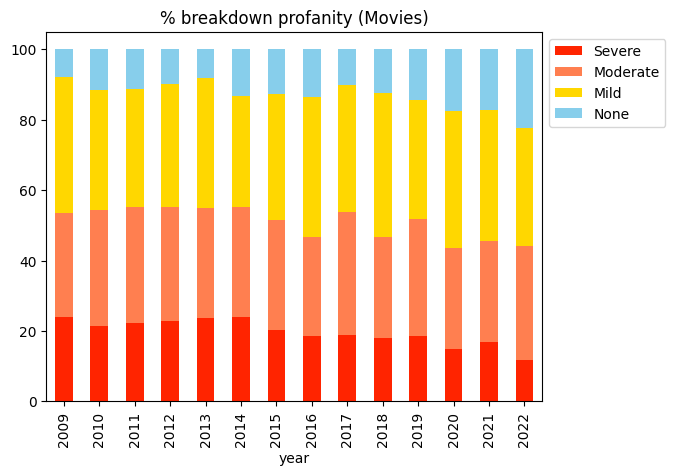

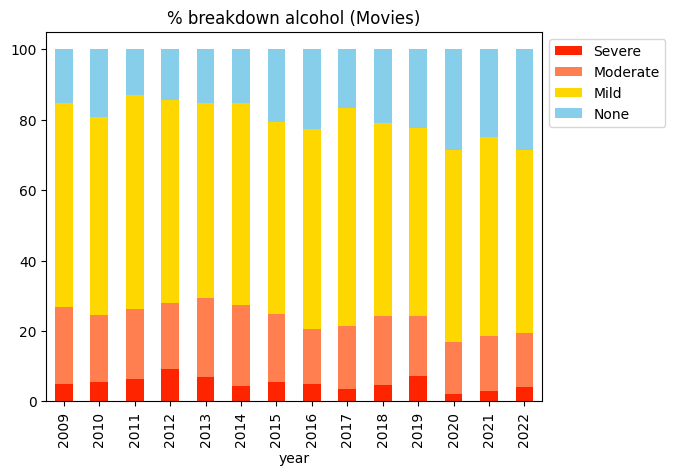

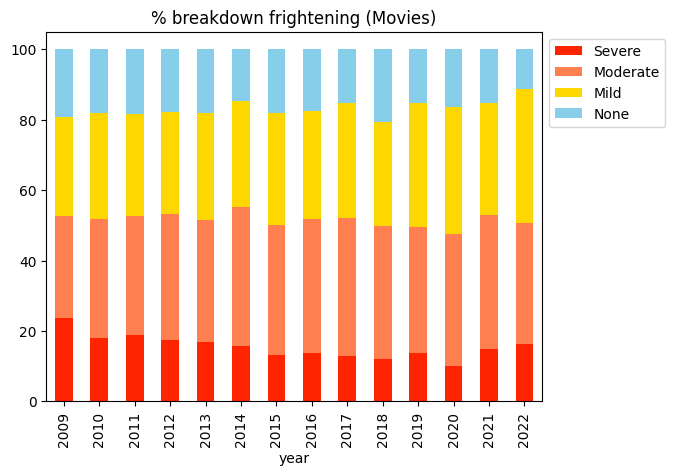

In [6]:
def plot_stacked_bar(advisory_type):
    ndf = df[['premiered', advisory_type]].value_counts().sort_index().unstack(-1)
    sev = ['None', 'Mild', 'Moderate', 'Severe']
    ndf['Total'] = ndf['None'] + ndf['Mild'] + ndf['Moderate'] + ndf['Severe']
    for s in sev:
        ndf[s] = ndf[s] / ndf['Total'] * 100
    ndf = ndf.drop(columns='Total')
    plot = ndf[['Severe', 'Moderate', 'Mild', 'None']].plot.bar(
        stacked=True, color=['#FF2400', '#FF7F50', '#FFD700', '#87CEEB'], xlabel='year')
    plot.set_title(f'% breakdown {advisory_type} ({title_type})')
    plot.legend(bbox_to_anchor=(1.0, 1.0))

for advisory_type in ['nudity', 'violence', 'profanity', 'alcohol', 'frightening']:
    plot_stacked_bar(advisory_type)

In [7]:
# Average ratings by year where nudity = severe
df_nudity_avg_rating = pd.read_csv('tv_ratings_nudity_severe.csv', index_col=0)
df_nudity_avg_rating

,avg_rating,total_votes
year,,
2009,7.750000,80967
2010,8.400000,558902
2011,8.400000,3657843
2012,7.700000,177890
2013,8.036364,1858753
2014,8.227273,1284556
2015,8.000000,720666
2016,7.420000,563346
2017,8.083333,1598324


<AxesSubplot: title={'center': 'Avg Rating - TV Shows w/ Severe Nudity'}, xlabel='year'>

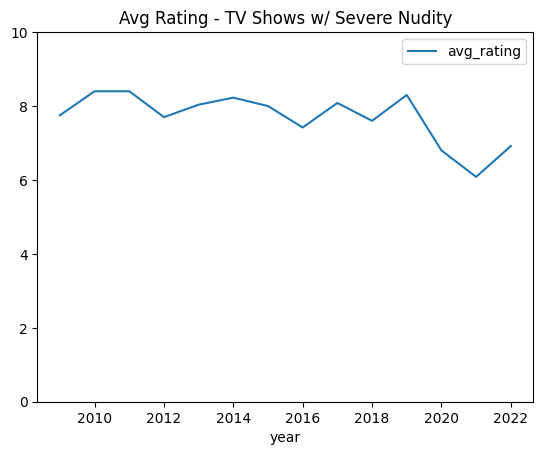

In [17]:
df_nudity_avg_rating.drop('total_votes', axis=1).plot.line(title='Avg Rating - TV Shows w/ Severe Nudity', ylim=[0,10])